Dapatkan akar pendekatan dari persamaan berikut $ f(x) = e^{-x} - x $ dan carilah Error Truenya jika harga sebenarnya `X = 0,56714329` 
$ Et = |\frac{exprerimental - true}{true}|  * 100% $

In [6]:
%pip install numpy tabulate matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from tabulate import tabulate

def f(x):
    return np.exp(-x) - x

def print_table(x, y, title=None):
    tabel_data = [[x[i], y[i]] for i in range(len(x))]
    headers = ["x", "f(x)"]
    if title: print(f"\n{title}")
    print(tabulate(tabel_data, headers, tablefmt="fancy_grid"))

def find_sign_change_interval(x, y):
    for i in range(len(y) - 1):
        if y[i] > 0 and y[i+1] < 0:
            return x[i], x[i+1]
    return None, None

# Tahapan refinemen
steps = [0.1, 0.01, 0.001]
x_start, x_end = 0, 1

# Inisialisasi

for idx, step in enumerate(steps):
    x = np.arange(x_start, x_end + step, step)
    y = f(x)
    
    print_table(x, y, title=f"Step {step}")

    x_start, x_end = find_sign_change_interval(x, y)
    if x_start is None:
        print("Tidak ditemukan perubahan tanda.")
        break



Step 0.1
╒═════╤════════════╕
│   x │       f(x) │
╞═════╪════════════╡
│ 0   │  1         │
├─────┼────────────┤
│ 0.1 │  0.804837  │
├─────┼────────────┤
│ 0.2 │  0.618731  │
├─────┼────────────┤
│ 0.3 │  0.440818  │
├─────┼────────────┤
│ 0.4 │  0.27032   │
├─────┼────────────┤
│ 0.5 │  0.106531  │
├─────┼────────────┤
│ 0.6 │ -0.0511884 │
├─────┼────────────┤
│ 0.7 │ -0.203415  │
├─────┼────────────┤
│ 0.8 │ -0.350671  │
├─────┼────────────┤
│ 0.9 │ -0.49343   │
├─────┼────────────┤
│ 1   │ -0.632121  │
╘═════╧════════════╛

Step 0.01
╒══════╤═════════════╕
│    x │        f(x) │
╞══════╪═════════════╡
│ 0.5  │  0.106531   │
├──────┼─────────────┤
│ 0.51 │  0.0904956  │
├──────┼─────────────┤
│ 0.52 │  0.0745205  │
├──────┼─────────────┤
│ 0.53 │  0.058605   │
├──────┼─────────────┤
│ 0.54 │  0.0427483  │
├──────┼─────────────┤
│ 0.55 │  0.0269498  │
├──────┼─────────────┤
│ 0.56 │  0.0112091  │
├──────┼─────────────┤
│ 0.57 │ -0.00447456 │
├──────┼─────────────┤
│ 0.58 │ -0.02010

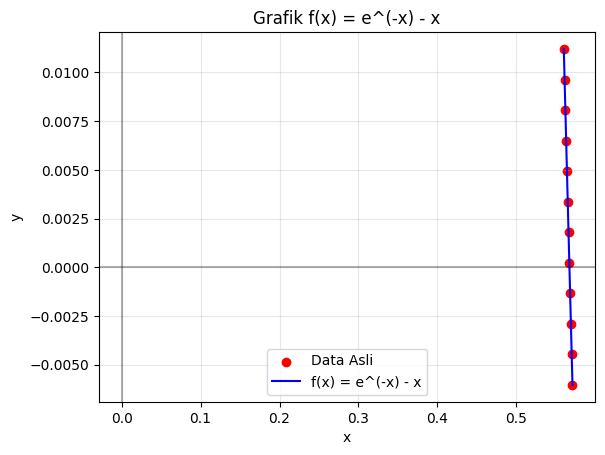

In [8]:
import matplotlib.pyplot as plt

x_curve = np.linspace(min(x), max(x), 100)
y_curve = [np.exp(-x) - x for x in x_curve]

plt.scatter(x, y, color='red', label="Data Asli")
plt.plot(x_curve, y_curve, 'b-', label='f(x) = e^(-x) - x')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Grafik f(x) = e^(-x) - x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
x_true = 0.56714329
Et = np.abs((x_true - x) / x_true) * 100
min_index = np.argmin(Et)
print(f"\nNilai pendekatan terbaik: x = {x[min_index]:.3f} dengan Et = {Et[min_index]:.3f}%")



Nilai pendekatan terbaik: x = 0.567 dengan Et = 0.025%
